## Clip Raster with Mask

__Description__: Tool to clip a stream grid raster by a catchment polygon. For additional details, see the [StreamStats Automation Wiki](https://github.com/Dewberry/usgs-tools/wiki/StreamStats-Automation).

__Input__: Stream grid from the [SteamStats Repository](https://streamstatsags.cr.usgs.gov/StreamGrids/directoryBrowsing.asp) as a tif and a catchment polygon for masking as a geojson.

__Output__: Clipped stream grid as a tif.

*Authors*: slawler@Dewberry.com & sputnam@Dewberry.com

### Load libraries and Python options:

In [1]:
import os
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from osgeo import gdal, ogr

### Load the stream network and the catchment boundary:

##### Specify:

In [2]:
stream_grid=r'C:\Users\sputnam\Documents\GitHub\usgs-tools\data\Stream_Grids\md_streamgrid.tif' #Stream grid raster

huc_poly=r'C:\Users\sputnam\Documents\GitHub\usgs-tools\data\Catchment_Polygon\RockCreekWS.geojson' #Catchment polygon

out_tif=r'C:\Users\sputnam\Documents\GitHub\usgs-tools\results\Rock_Creek.tif' #Clipped stream grid raster

### Open the stream grid:

In [3]:
data = rasterio.open(stream_grid) #Open the stream grid using rasterio

raster_crs = data.crs #Extract the coordinate reference system

##### Display:

In [4]:
show((data, 1), cmap='terrain') #Display the stream grid

<Figure size 640x480 with 1 Axes>

### Open the catchment polygon:

In [5]:
gdf = gpd.read_file(huc_poly) #Read the catchment polygon as a geodataframe

gdf = gdf.to_crs(raster_crs) #Convert the coordinate system of the catchment polygon to that to the stream grid

geom = gdf.geometry[0] #Extract the geometry key

##### Display:

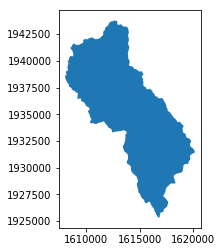

In [6]:
gdf.plot() #Display the catchment polgyon

### Mask:

In [7]:
out_img, out_transform = mask(dataset=data, shapes=geom, crop=True) #Mask the stream grid with the catchment polygon using rasterio.mask

out_meta = data.meta.copy() #Make a copy of the raster's metadata

out_meta.update({"driver": "GTiff", "height": out_img.shape[1], "width": out_img.shape[2], "transform": out_transform, "crs":raster_crs}) #Update the metadata for the raster

### Save the results:

In [8]:
with rasterio.open(out_tif, "w", **out_meta) as dest:
    dest.write(out_img)

##### Display:

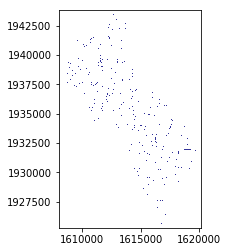

In [9]:
show((rasterio.open(out_tif), 1), cmap='terrain')

# End